<a href="https://colab.research.google.com/github/emememinem/PPzadek/blob/main/22Fantova_PPZDsemestralka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd 
import statistics as sts 
import matplotlib.pyplot as plt #grafy

In [51]:
#url adresy
urls1 = [
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2001.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2002.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2003.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2004.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2005.csv"] #01-05
urls2 = [
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2006.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2007.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2008.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2009.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2010.csv"] #06-10
urls3 = [
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2011.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2012.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2013.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2014.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2015.csv"] #11-15
urls4 = [
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2016.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2017.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2018.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2019.csv",
"https://raw.githubusercontent.com/emememinem/PPzadek/main/KPopHits2020.csv"] #16-20

In [52]:
def KPHurls(urls): #načítá do DF, maže sloupce, spojuje
    dfpole = [] # seznam/pole kam se budou přidávat ty dataframed urls
    for url in urls: # for cyklus, který načítá a přidává do pole
        df = pd.read_csv(url) # načítá do dataframe
        df_bez = df.drop(["nub", "energy", "mode", "speechiness", "acousticness", "valence", "time_signature"], axis=1) # axis=1 => maže sloupce podle jménaa
        df_bezz = df_bez[~df_bez["artist/s"].str.contains("코케","Various Artists")] #maže sloupce obsahující (chyběly hodnoty=>dělalo bordel)
        dfpole.append(df_bezz) # přidává na konec seznamu dfpole
    merged_dfpole = pd.concat(dfpole, ignore_index=True) # spojení dat 
    return merged_dfpole

kph1 = KPHurls(urls1) #1-5
kph2 = KPHurls(urls2) #6-10
kph3 = KPHurls(urls3) #11-15
kph4 = KPHurls(urls4) #15-20

#print(kph1.to_string())

In [53]:
def top10(kph): #funkce na top 10 ze seznamu
  kph["artists_list"] = kph["artist/s"].str.split(",")  #v jendom řádku je více hodnot
  artist_counts = kph.explode("artists_list")["artists_list"].value_counts() # spočítá počty výskytů každého názvu umělce
#explode("artists_list") - rozbalení seznamu hodnot v sloupci "artists_list" - rozbalí seznam na jednotlivé hodnoty a vytvoří nový řádek pro každou hodnotu
  artist_countsTOP = artist_counts.head(10) #top 10
  return artist_countsTOP

kph1top = top10(kph1)
kph2top = top10(kph2)
kph3top = top10(kph3)
kph4top = top10(kph4)

print(kph1top)

Jang Na-ra       5
BoA              5
Lee Soo Young    5
SHINHWA          5
Sung Si Kyung    4
Realslow         4
Un               3
TVXQ!            3
Gummy            3
Rain             3
Name: artists_list, dtype: int64


<ipython-input-68-33ef270da076>:13: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  plt.tight_layout()
<ipython-input-68-33ef270da076>:13: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  plt.tight_layout()
<ipython-input-68-33ef270da076>:13: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  plt.tight_layout()
<ipython-input-68-33ef270da076>:13: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  plt.tight_layout()
<ipython-input-68-33ef270da076>:13: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
<ipython-input-68-33ef270da076>:13: UserWarning: Glyph 46308 (\N{HANGUL SYLLABLE DEUL}) missing from current font.
  plt.tight_layout()


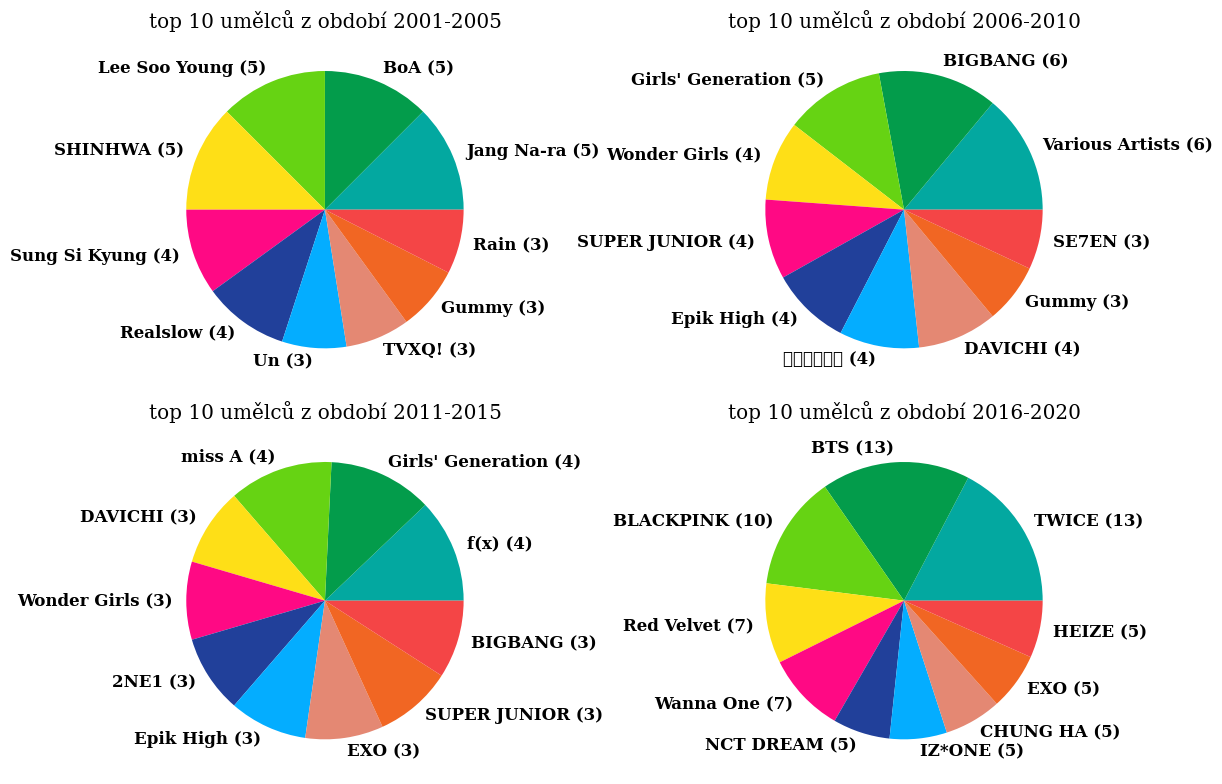

In [68]:
#4ezký grafy
barvy = ["#03a8a0", "#039c4b", "#66d313", "#fedf17", "#ff0984", "#21409a", "#04adff", "#e48873", "#f16623", "#f44546"]
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 mřížka grafu
axs[0, 0].pie(kph1top, labels=[f"{label} ({count})" for label, count in zip(kph1top.index, kph1top)], colors=barvy) #procházení dvou seznamů současně
axs[0, 0].set_title("top 10 umělců z období 2001-2005")  
axs[0, 1].pie(kph2top, labels=[f"{label} ({count})" for label, count in zip(kph2top.index, kph2top)], colors=barvy)
axs[0, 1].set_title("top 10 umělců z období 2006-2010") 
axs[1, 0].pie(kph3top, labels=[f"{label} ({count})" for label, count in zip(kph3top.index, kph3top)], colors=barvy)
axs[1, 0].set_title("top 10 umělců z období 2011-2015")
axs[1, 1].pie(kph4top, labels=[f"{label} ({count})" for label, count in zip(kph4top.index, kph4top)], colors=barvy)
axs[1, 1].set_title("top 10 umělců z období 2016-2020")

plt.tight_layout() 
plt.show()


In [69]:
#mediany a průměry - počítání
def mediany(kph):
    kategorie = ["key", "danceability", "loudness", "tempo", "duration_ms"]
    med = {} #slovník ukládání vypočítaných mediánů. Klíče slovníku budou odpovídat jednotlivým kategoriím.
    for sloup in kategorie:
        med[sloup] = kph[sloup].median() # pomocí kph[sloup] se získá sloupec odpovídající aktuální kategorii
    return med

def prumery(kph):
    kategorie = ["key", "danceability", "loudness", "tempo", "duration_ms"]
    pru = {} #-//-
    for sloup in kategorie:
        pru[sloup] = kph[sloup].mean() #-//-
    return pru

kph1_med = mediany(kph1)
kph1_pru = prumery(kph1)

kph2_med = mediany(kph2)
kph2_pru = prumery(kph2)

kph3_med = mediany(kph3)
kph3_pru = prumery(kph3)

kph4_med = mediany(kph4)
kph4_pru = prumery(kph4)

print(kph1_med)
print(kph1_pru)
#print(kph2_pru)
#print(kph3_med)
#print(kph3_pru)
#print(kph4_med)
#print(kph4_pru)

{'key': 7.0, 'danceability': 0.627, 'loudness': -5.457, 'tempo': 119.878, 'duration_ms': 243722.0}
{'key': 6.240875912408759, 'danceability': 0.6067153284671534, 'loudness': -5.8907299270073, 'tempo': 118.32352554744526, 'duration_ms': 245646.99270072993}


In [56]:
#pomocí if/elif/else kouknout, jak moc se medián a průměr liší - má/nemá extrémy
def porovnaX(kph_med, kph_pru):
    kategorie = ["key", "danceability", "loudness", "tempo", "duration_ms"] #co hodnotim
    
    for kat in kategorie:
        rozdil = abs(kph_med[kat] - kph_pru[kat]) #záporný hodnoty
        
        if kat == "key":
            if rozdil > 0.2:
                print("{} má extrémní hodnoty".format(kat)) #=vytiskne ti tu kategori 
            else:
                print("{} nemá extrémní hodnoty".format(kat))
        elif kat == "danceability":
            if rozdil > 0.02:
                print("{} má extrémní hodnoty".format(kat))
            else:
                print("{} nemá extrémní hodnoty".format(kat))
        elif kat == "loudness":
            if rozdil > 0.2:
                print("{} má extrémní hodnoty".format(kat))
            else:
                print("{} nemá extrémní hodnoty".format(kat))
        elif kat == "tempo":
            if rozdil > 1.5:
                print("{} má extrémní hodnoty".format(kat))
            else:
                print("{} nemá extrémní hodnoty".format(kat))
        elif kat == "duration_ms":
            if rozdil > 5000:
                print("{} má extrémní hodnoty".format(kat))
            else:
                print("{} nemá extrémní hodnoty".format(kat))

porovnaX(kph1_med, kph1_pru)
#porovnaX(kph2_med, kph2_pru)
#porovnaX(kph3_med, kph3_pru)
#porovnaX(kph4_med, kph4_pru)


key má extrémní hodnoty
danceability má extrémní hodnoty
loudness má extrémní hodnoty
tempo má extrémní hodnoty
duration_ms nemá extrémní hodnoty
